# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)
print(x_train.ndim)
print(x_train.dtype)

print(x_test.shape)

(50000, 32, 32, 3)
4
uint8
(10000, 32, 32, 3)


In [2]:
# Verify unique labels in the dataset
unique_labels = np.unique(y_train)
print("Unique labels in the dataset:", unique_labels)

Unique labels in the dataset: [0 1 2 3 4 5 6 7 8 9]


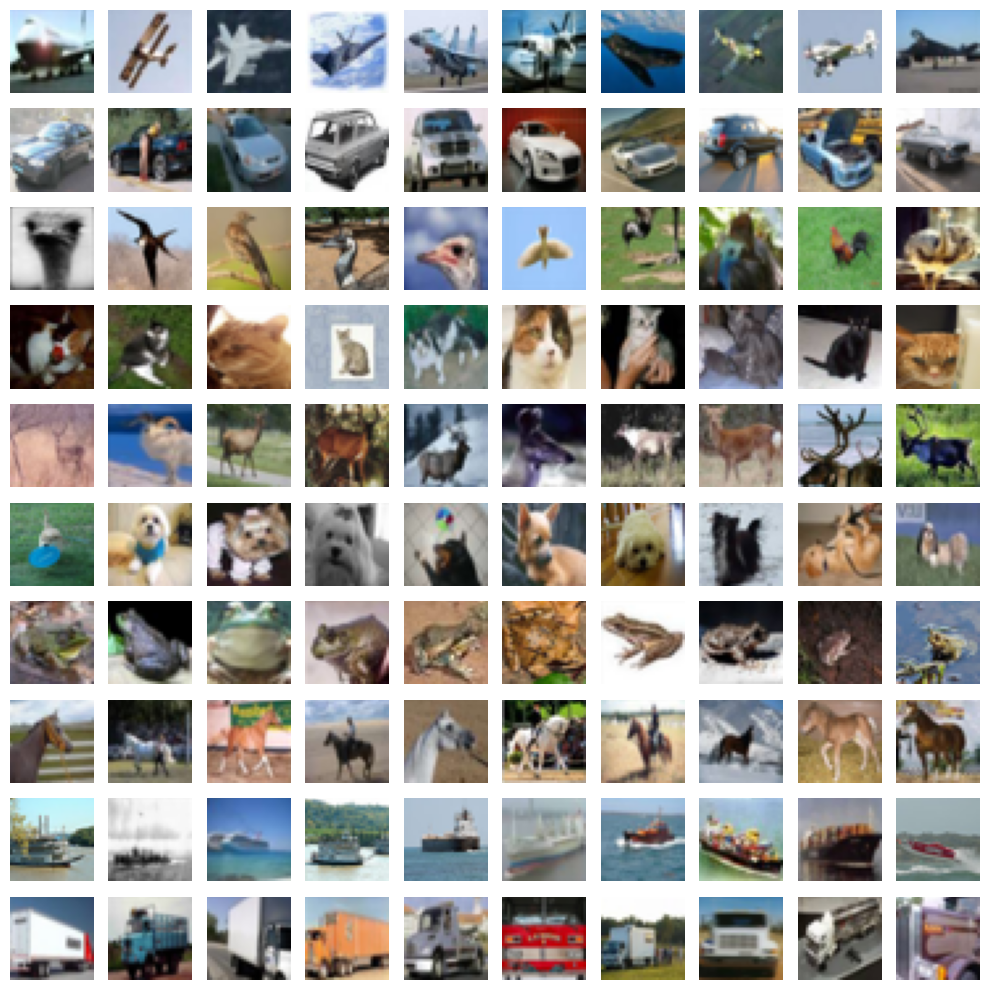

In [3]:
# Your code here :
import numpy as np
import matplotlib.pyplot as plt

# Create a 10x10 grid showing 10 images per class
plt.figure(figsize=(10, 10))

# Iterate over the 10 classes (0 to 9)
for class_idx in range(10):
    # Find all indices of the current class
    class_indices = np.where(y_train == class_idx)[0]

    # Randomly select 10 images from the current class
    selected_indices = np.random.choice(class_indices, 10, replace=False)

    # Plot the 10 images in the current row
    for i, img_index in enumerate(selected_indices):
        plt.subplot(10, 10, class_idx * 10 + i + 1)  # Position in the grid
        plt.imshow(x_train[img_index])
        plt.axis('off')  # Hide axes for clarity

plt.tight_layout()
plt.show()

In [3]:
#Normalization
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
# Verify the shape
print("Original shape of y_train:", y_train.shape)

Original shape of y_train: (50000, 1)


In [4]:
# To convert the labels to on-hot encoded form:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Verify the shape
print("Shape after one-hot encoding:", y_train.shape)

# Print an example
print("One-hot encoded label:", y_train[0])

Shape after one-hot encoding: (50000, 10)
One-hot encoded label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [7]:
from keras.backend import clear_session
clear_session()

In [8]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [10]:
# Your code here :
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
#Train
history = model.fit(x_train, y_train, batch_size=512, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.1850 - loss: 2.2131 - val_accuracy: 0.2861 - val_loss: 2.0383
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3046 - loss: 1.9570 - val_accuracy: 0.3310 - val_loss: 1.8875
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3350 - loss: 1.8791 - val_accuracy: 0.3620 - val_loss: 1.8111
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3649 - loss: 1.8112 - val_accuracy: 0.3803 - val_loss: 1.7714
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3858 - loss: 1.7672 - val_accuracy: 0.3998 - val_loss: 1.7144
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4006 - loss: 1.7183 - val_accuracy: 0.4053 - val_loss: 1.6966
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4172 - loss: 1.6786 - val_accuracy: 0.4202 - val_loss: 1.6514
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4306 - loss: 1.6423 - val_accuracy: 0.4163 - val

*   Plot the cross entropy loss curve and the accuracy curve

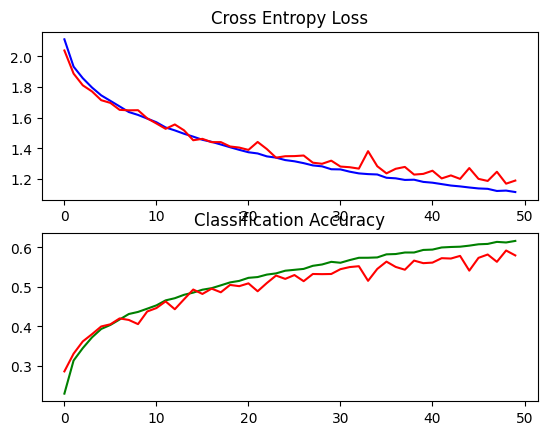

In [12]:
# Your code here :
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [18]:
from keras.backend import clear_session
clear_session()

In [19]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model_vgg = Sequential()
model_vgg.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model_vgg.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model_vgg.add(MaxPooling2D((2, 2)))
model_vgg.add(Flatten())
model_vgg.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_vgg.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [20]:
# Your code here :
model_vgg.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

#Train
history_vgg = model_vgg.fit(x_train, y_train, batch_size=512, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.1832 - loss: 2.2699 - val_accuracy: 0.2727 - val_loss: 2.0118
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3045 - loss: 1.9672 - val_accuracy: 0.3227 - val_loss: 1.8939
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3461 - loss: 1.8501 - val_accuracy: 0.3730 - val_loss: 1.7732
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3838 - loss: 1.7563 - val_accuracy: 0.3975 - val_loss: 1.7285
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4009 - loss: 1.7125 - val_accuracy: 0.3833 - val_loss: 1.7657
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4294 - loss: 1.6355 - val_accuracy: 0.4318 - val_loss: 1.6166
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4409 - loss: 1.5888 - val_accuracy: 0.4608 - val_loss: 1.5379
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4582 - loss: 1.5432 - val_accuracy: 0.4436 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


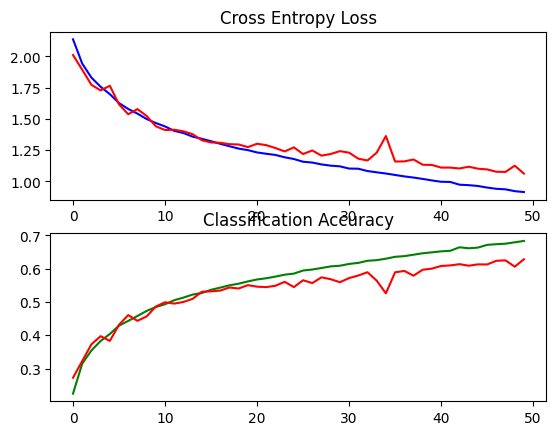

In [21]:
# Your code here :

#VGG Model Plot
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_vgg.history['loss'], color='blue', label='train')
plt.plot(history_vgg.history['val_loss'], color='red', label='val')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history_vgg.history['accuracy'], color='green', label='train')
plt.plot(history_vgg.history['val_accuracy'], color='red', label='val')
plt.show()

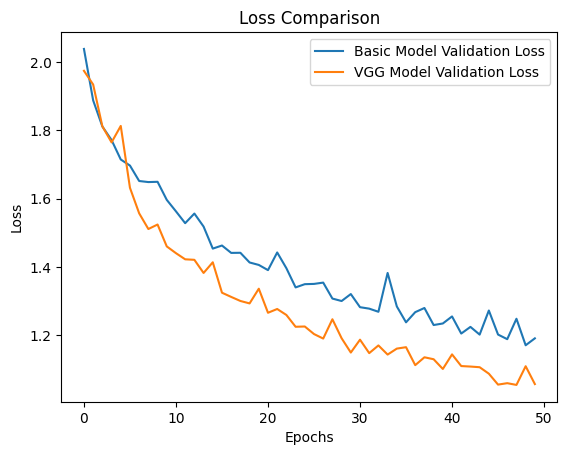

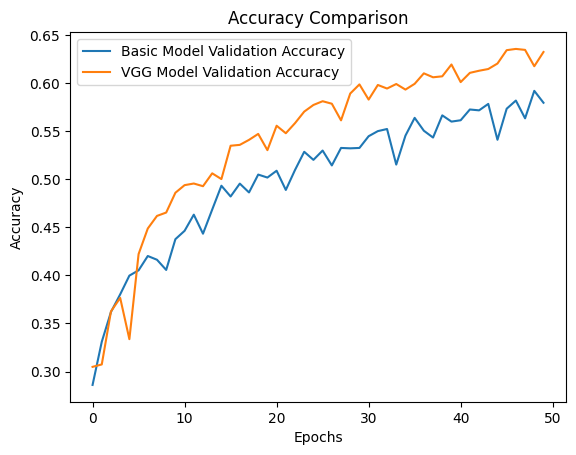

In [17]:
#Comparisson
#Plot both models' loss curves
plt.plot(history.history['val_loss'], label='Basic Model Validation Loss')
plt.plot(history_vgg.history['val_loss'], label='VGG Model Validation Loss')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot both models' accuracy curves
plt.plot(history.history['val_accuracy'], label='Basic Model Validation Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='VGG Model Validation Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Comment on the observation**

*(Double-click or enter to edit)*

Comparisson Conclusions Summary:
  The VGG model significantly outperforms the basic model in terms of accuracy and loss.

  This improvement is attributed to the deeper architecture with multiple convolutional layers, enabling better feature extraction.
...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [22]:
# Your code here :
import numpy as np
predictions = model_vgg.predict(x_test)

print(predictions.shape)
predictions = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 10)


In [23]:
from sklearn.metrics import confusion_matrix
gt = np.argmax(y_test, axis=1)
confusion_matrix(gt, predictions)

array([[683,  17,  50,  20,  18,   6,  18,  12, 134,  42],
       [ 30, 714,  11,  17,   5,   6,  16,   8,  58, 135],
       [ 75,  11, 454,  79, 115,  79, 100,  53,  21,  13],
       [ 18,   8,  77, 435,  89, 173, 112,  36,  24,  28],
       [ 26,   6,  82,  60, 564,  50, 107,  79,  21,   5],
       [ 16,   4,  57, 185,  71, 521,  57,  66,  17,   6],
       [  9,   5,  44,  64,  50,  25, 768,  14,  10,  11],
       [ 16,   8,  42,  46,  69,  86,  23, 675,  10,  25],
       [ 61,  51,  13,  15,   6,  11,  12,   5, 788,  38],
       [ 31, 114,  14,  22,   7,  15,  16,  24,  73, 684]])

**Comment here :**

*(Double-click or enter to edit)*

Observations

Diagonal Elements (Correct Predictions):

  The diagonal elements represent correctly classified samples for each class.
  For example:
    Class 0: 683 correct predictions.
    Class 9: 684 correct predictions.
  Classes 0 and 9 show strong performance with high correct predictions.

Off-Diagonal Elements (Misclassifications):

  Misclassifications occur primarily for visually similar classes. Some notable trends include:
    Class 2: 75 samples misclassified as Class 0 and 79 as Class 1.
    Class 4 (Deer): Misclassified 89 times as Class 2 and 85 times as Class 6 (Frogs).
    Class 8: 61 samples misclassified as Class 6.
  These misclassifications suggest the model struggles to differentiate between classes with overlapping visual features, especially animals.

Performance:
Best Performing Classes:

  Class 0 and Class 9: Highest correct predictions with minimal misclassifications.
    These classes likely have distinct visual features.

Worst Performing Classes:

  Class 4 (Deer): Significant misclassifications across other animal-related classes (e.g., Class 6).
  Class 2 (Bird): Confused with Class 0 and Class 1.

General Pattern:

  The model performs well on classes with distinct features (e.g., vehicles like Class 0 and Class 9).
  It struggles with animals that have more visually similar characteristics.

...

*    Print the test accuracy for the trained model.

In [24]:
# Your code here :
test_loss, test_acc = model_vgg.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6318 - loss: 1.0479
Test loss: 1.063119649887085
Test accuracy: 0.628600001335144


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [5]:
from keras.backend import clear_session
clear_session()

In [7]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model_vgg_full = Sequential()
model_vgg_full.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model_vgg_full.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_vgg_full.add(MaxPooling2D((2, 2), padding='same'))
model_vgg_full.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg_full.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg_full.add(MaxPooling2D((2, 2), padding='same'))
model_vgg_full.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg_full.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg_full.add(MaxPooling2D((2, 2), padding='same'))
model_vgg_full.add(Flatten())
model_vgg_full.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_vgg_full.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [8]:
# Your code here :
from tensorflow.image import resize
x_train_64 = np.array([resize(img, [64, 64]) for img in x_train])
x_test_64 = np.array([resize(img, [64, 64]) for img in x_test])



In [9]:
model_vgg_full.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

#Train
history_vgg_full = model_vgg_full.fit(x_train_64, y_train, batch_size=512, epochs=10, validation_data=(x_test_64, y_test))


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.1070 - loss: 2.3010 - val_accuracy: 0.1074 - val_loss: 2.2910
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 369ms/step - accuracy: 0.1127 - loss: 2.2846 - val_accuracy: 0.1580 - val_loss: 2.2487
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 378ms/step - accuracy: 0.1843 - loss: 2.2141 - val_accuracy: 0.2683 - val_loss: 2.0692
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 368ms/step - accuracy: 0.2548 - loss: 2.0821 - val_accuracy: 0.2898 - val_loss: 2.0104
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 370ms/step - accuracy: 0.2918 - loss: 2.0019 - val_accuracy: 0.2677 - val_loss: 2.1823
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 369ms/step - accuracy: 0.3116 - loss: 1.9450 - val_accuracy: 0.3533 - val_loss: 1.8372
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 370ms/step - accuracy: 0.3413 - loss: 1.8628 - val_accuracy: 0.3758 - val_loss: 1.7776
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 376ms/step - accuracy: 0.3637 - loss: 1.7957 - val_accura

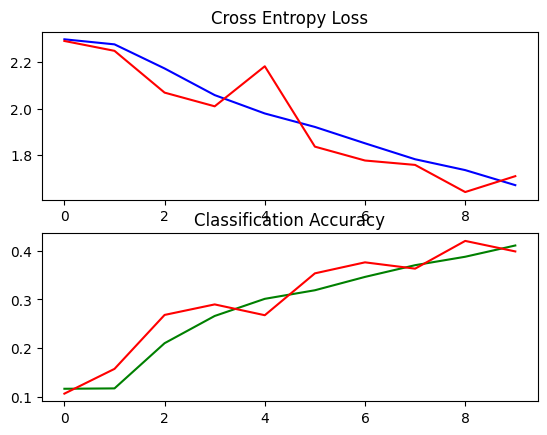

In [10]:
# Your code here :

#VGG Full Model Plot
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_vgg_full.history['loss'], color='blue', label='train')
plt.plot(history_vgg_full.history['val_loss'], color='red', label='val')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history_vgg_full.history['accuracy'], color='green', label='train')
plt.plot(history_vgg_full.history['val_accuracy'], color='red', label='val')
plt.show()

In [14]:
# Your code here :
import numpy as np
predictions = model_vgg_full.predict(x_test_64)

print(predictions.shape)
predictions = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step
(10000, 10)


In [15]:
from sklearn.metrics import confusion_matrix
gt = np.argmax(y_test, axis=1)
confusion_matrix(gt, predictions)

array([[310,  43,  46, 200,  31,  22,  32, 132,  84, 100],
       [  4, 492,   0, 115,  11,  19,  77, 110,  22, 150],
       [ 19,  30,  85, 250, 157,  65, 206, 172,   6,  10],
       [  0,  28,  10, 497,  59,  99, 170, 105,   4,  28],
       [ 11,  13,  20, 154, 305,  24, 289, 162,   7,  15],
       [  2,  13,  14, 349,  56, 267, 135, 147,   5,  12],
       [  0,  12,   8, 188,  90,  18, 610,  62,   2,  10],
       [  1,  17,   9, 133,  69,  48,  65, 617,   7,  34],
       [ 78,  81,   9, 170,  27,  14,  29,  76, 344, 172],
       [  4, 164,   3, 134,   4,  18,  52, 147,  20, 454]])

In [17]:
# Your code here :
test_loss, test_acc = model_vgg_full.evaluate(x_test_64, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3994 - loss: 1.7071
Test loss: 1.7104045152664185
Test accuracy: 0.39809998869895935


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Purpose:
Activation functions introduce non-linearity into a neural network, allowing it to learn and approximate complex relationships in the data.
Without activation functions, the network would behave like a linear regression model, regardless of its depth.
Why Needed:
They enable the network to capture non-linear patterns in the input data.
They help propagate meaningful gradients during backpropagation for effective training.
Common Activation Functions:

ReLU: Used in hidden layers to mitigate vanishing gradients.
Sigmoid: Used in binary classification.
Softmax: Used in multi-class classification
_

2 - Key Differences between sigmoid and softmax:

Sigmoid:
  Outputs values between 0 and 1.
  Used for binary classification tasks.
  Treats each class independently

Softmax:
  Outputs values between 0 and 1, summing to 1.
  Used for multi-class classification tasks.
  Treats all classes collectively by normalizing probabilities.
_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Categorical Crossentropy:
  Use Case=>Multi-class classification (3 or more classes)
  Output Layer=>Used with Softmax activation.
  Input Labels=>One-hot encoded (e.g., [0, 1, 0]).

Binary Crossentropy:
  Use Case=>Binary classification (2 classes).
  Output Layer=>Used with Sigmoid activation.
  Input Labels=>Binary labels: 0 or 1.
_
